# PREDICTING HOURS

In [1]:
#importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
#reading data from remote link
url ="http://bit.ly/w-data"
s_data=pd.read_csv(url)
print("Data imported successfully")

s_data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Now lets plot data points on a 2-d graph

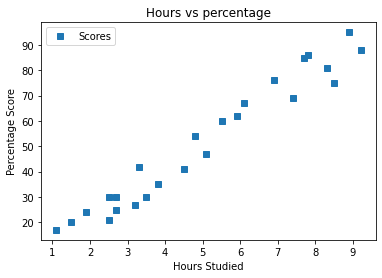

In [12]:
#plotting
s_data.plot(x="Hours", y="Scores", style='s')
plt.title("Hours vs percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

# Through this graph we can observe that there is an linear relationship between number of hours studied and percentage scored.

# preparing the data

In [13]:
x= s_data.iloc[:, :-1].values
y=s_data.iloc[:, 1].values


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

## Training the algorithm

In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

print("Training complete.")

Training complete.


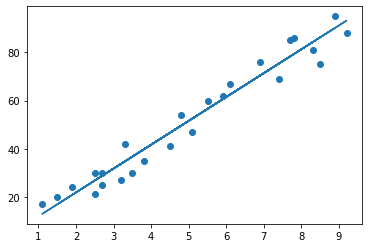

In [18]:
#plotting the regression line

line = regressor.coef_*x+regressor.intercept_

#plotting for the test data
plt.scatter(x,y)
plt.plot(x, line)
plt.show()

## making predictions

Now we will be predicting as we have trained our algorithm.

In [19]:
print(x_test) #Testing data - In hours
y_pred = regressor.predict(x_test) #predicting the score

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [20]:
#comparing actual vs predicted
df = pd.DataFrame({'ACTUAL': y_test, 'PREDICTED': y_pred})
df

,ACTUAL,PREDICTED
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [26]:
#we can also test with our own data
t_hours = 40
own_pred = regressor.predict([[t_hours]])
print("No of Hours = {}".format(t_hours))
print("Predicted Score= {}".format(own_pred[0]))

No of Hours = 40
Predicted Score= 398.4444192671242


# Evaluating the model

mean square error for evaluating the performance of algorithm

In [27]:
from sklearn import metrics
print('Mean absolute error : ', metrics.mean_absolute_error(y_test, y_pred))

Mean absolute error :  4.18385989900298
